In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import joblib


In [3]:
# Load all CSV files
path = "../data/*.csv"
files = glob.glob(path)

df_list = []

for file in files:
    data = pd.read_csv(file)
    print(f"{file} Shape:", data.shape)
    df_list.append(data)

# Combine all locations
df = pd.concat(df_list, ignore_index=True)

print("\nFinal Dataset Shape:", df.shape)
df.head()


../data\Location1.csv Shape: (43800, 10)
../data\Location2.csv Shape: (43800, 10)
../data\Location3.csv Shape: (43800, 10)
../data\Location4.csv Shape: (43800, 10)

Final Dataset Shape: (175200, 10)


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 13.4+ MB


In [5]:
df.isnull().sum()


Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [7]:
# 10m direction
df["winddir10_sin"] = np.sin(np.radians(df["winddirection_10m"]))
df["winddir10_cos"] = np.cos(np.radians(df["winddirection_10m"]))

# 100m direction
df["winddir100_sin"] = np.sin(np.radians(df["winddirection_100m"]))
df["winddir100_cos"] = np.cos(np.radians(df["winddirection_100m"]))

df.head()


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,winddir10_sin,winddir10_cos,winddir100_sin,winddir100_cos
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0.559193,-0.829038,0.309017,-0.951057
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0.484810,-0.874620,0.374607,-0.927184
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0.529919,-0.848048,0.500000,-0.866025
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0.848048,0.529919,0.965926,-0.258819
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0.848048,0.529919,0.994522,0.104528


In [8]:
features = [
    "temperature_2m",
    "relativehumidity_2m",
    "dewpoint_2m",
    "windspeed_10m",
    "windspeed_100m",
    "windgusts_10m",
    "winddir10_sin",
    "winddir10_cos",
    "winddir100_sin",
    "winddir100_cos"
]

target = "Power"

X = df[features]
y = df[target]

print("Feature Shape:", X.shape)


Feature Shape: (175200, 10)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (140160, 10)
Test Shape: (35040, 10)


In [10]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

print("✅ Model Training Completed")


✅ Model Training Completed


In [11]:
pred = model.predict(X_test)

pred[:5]


array([0.070742, 0.601478, 0.102027, 0.167457, 0.293958])

In [12]:
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print(f"R2 Score : {r2:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")


R2 Score : 0.5796
MAE      : 0.1256
RMSE     : 0.1676


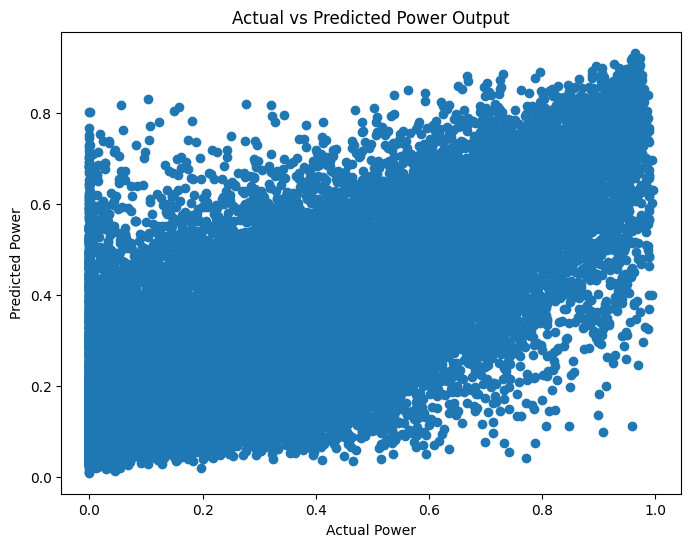

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred)
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.title("Actual vs Predicted Power Output")
plt.show()


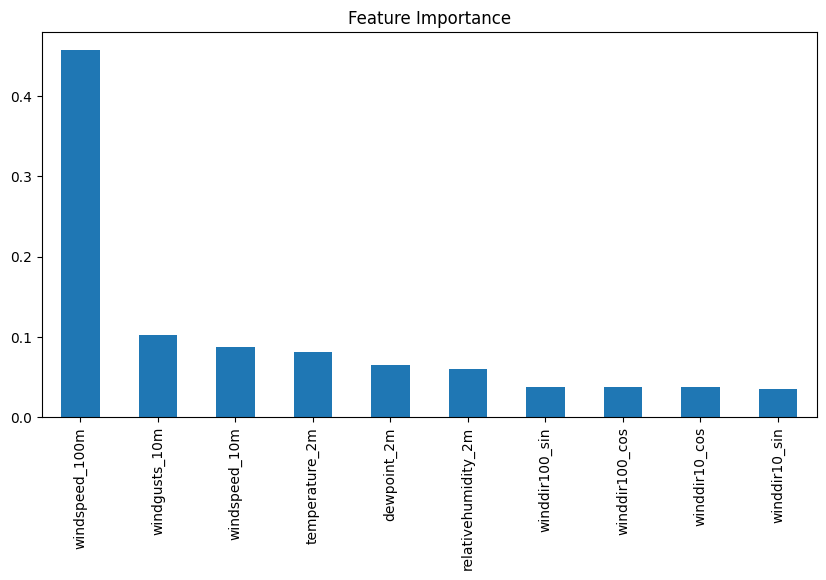

In [14]:
importance = pd.Series(
    model.feature_importances_,
    index=features
).sort_values(ascending=False)

importance.plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance")
plt.show()


In [ ]:
joblib.dump(model, "model/wind_model.pkl")

print("✅ Model Saved Successfully")
